<a href="https://colab.research.google.com/github/paula-33/Bootcamp-UniSENAI---Ciencia-de-dados/blob/main/notebook/1_EAD_e_Tratamento_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contextualização do Projeto:**
O objetivo do projeto é desenvolver um sistema inteligente de controle de qualidade para chapas de aço inoxidável, utilizando um conjunto de dados fornecido pela empresa. Esse conjunto de dados é composto por 31 indicadores geométricos e estatísticos extraídos de imagens de superfície das chapas, visando a identificação e classificação automática de defeitos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# **1. Obtenção dos Dados**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp DS/Projeto Final/Cópia de bootcamp_train.csv')

# Nota: analisaremos apenas o conjunto de treino;
print("\n▶️  Dimensões — df treino:", df.shape  )


▶️  Dimensões — df treino: (3390, 39)


In [3]:
train = df.copy()

In [4]:
print("\n -  Tipos de dados")
print(train.dtypes.value_counts())

print("\n -  Informações dos dados")
print(train.info())

print("\n - Primeiras linhas")
print(train.head(3))


 -  Tipos de dados
float64    20
int64      10
object      7
bool        2
Name: count, dtype: int64

 -  Informações dos dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float

 **Notas**

* **id** é apenas um identificador; ele não faz parte dos 31 indicadores exigidos pela empresa.

* Os 7 campos falha_* constituem as classes de defeito. Eles ficam fora da contagem de indicadores porque representam o alvo (rótulo) do modelo.

* Os 31 indicadores estão distribuídos entre cinco grandes grupos (coordenadas - 4, dimensões - 6, luminosidade - 4, índices de forma - 12 e variáveis de processo - 5).


**Tipos de Variáveis:**

Numéricas: Coordenadas, peso, área, perímetro, luminosidade, espessura, dimensões e  índices.

Categóricas: Tipos de falhas (falha_1 a falha_6 e falha_outros), tipo de aço (A300, A400).


# **2. Análise Exploratória de Dados (EDA)**

- Análise Estatística Descritiva das Variáveis.

    Para as 31 variáveis preditoras do conjunto df_train.csv, apresentamos estatísticas descritivas agrupadas por categoria:

In [5]:
print("\n - Nome das Variáveis")
print(train.columns)


 - Nome das Variáveis
Index(['id', 'x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'peso_da_placa',
       'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade',
       'maximo_da_luminosidade', 'comprimento_do_transportador',
       'tipo_do_aço_A300', 'tipo_do_aço_A400', 'espessura_da_chapa_de_aço',
       'temperatura', 'index_de_bordas', 'index_vazio', 'index_quadrado',
       'index_externo_x', 'indice_de_bordas_x', 'indice_de_bordas_y',
       'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_global_externo',
       'log_das_areas', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao',
       'indice_de_luminosidade', 'sigmoide_das_areas',
       'minimo_da_luminosidade', 'falha_1', 'falha_2', 'falha_3', 'falha_4',
       'falha_5', 'falha_6', 'falha_outros'],
      dtype='object')


## 2.1 Coordenadas da Bounding Box (x_mínimo, x_máximo, y_mínimo, y_máximo)

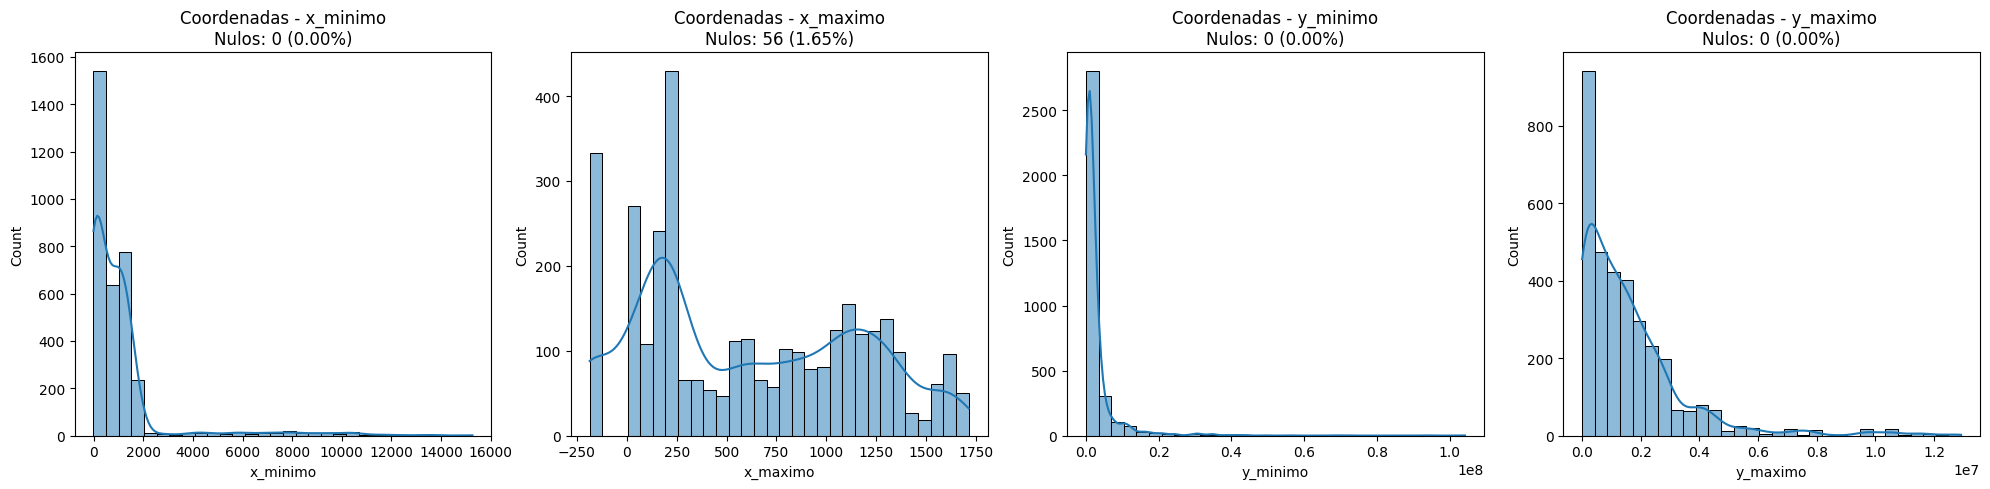

In [13]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo'], 1):
    plt.subplot(1, 4, i)
    sns.histplot(train[col], kde=True, bins=30)

    # Cálculo de nulos
    num_nulls = train[col].isnull().sum()
    percentage_nulls = (num_nulls / len(train)) * 100

    # Título com informações de nulos
    plt.title(
        f"Coordenadas - {col}\nNulos: {num_nulls} ({percentage_nulls:.2f}%)"
    )

plt.tight_layout()
plt.show()


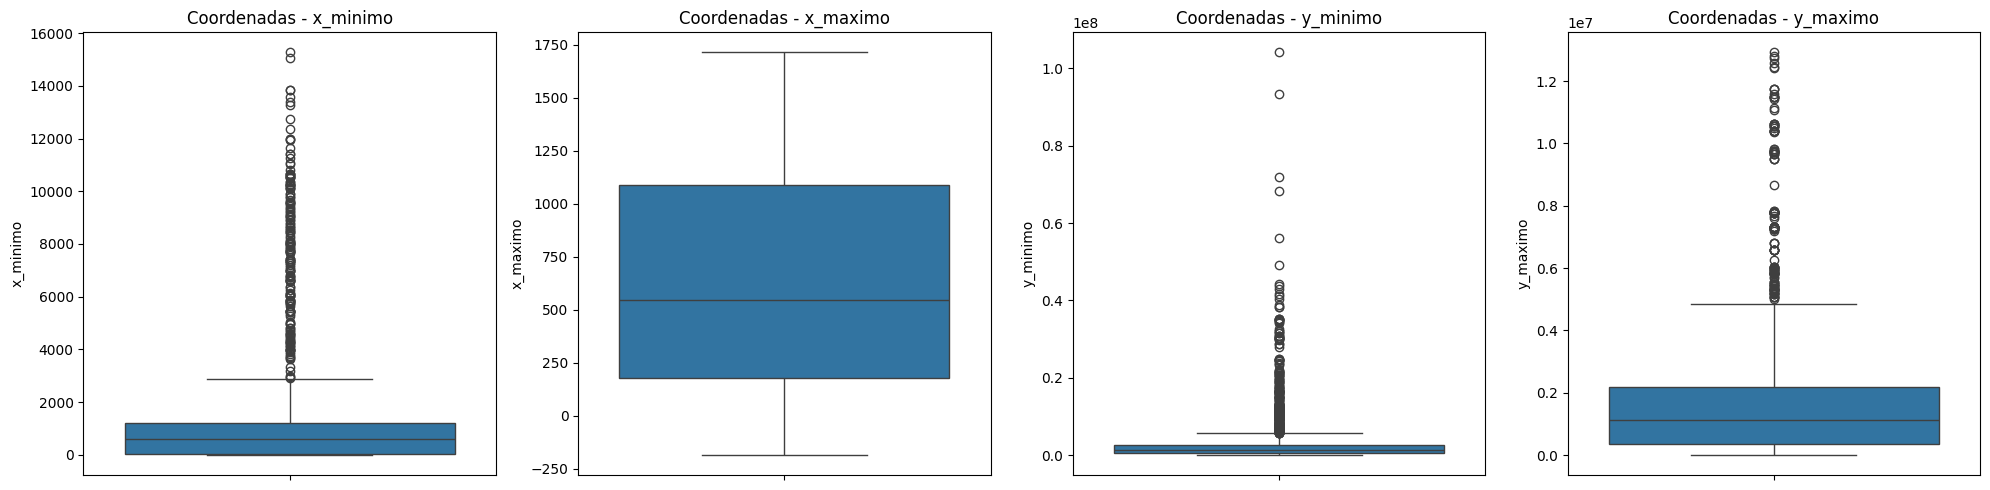

In [12]:

plt.figure(figsize=(20, 5))
for i, col in enumerate(['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=train[col]) # Changed to boxplot
    plt.title(f"Coordenadas - {col}")
plt.tight_layout()
plt.show()


In [14]:
# Medidas descritivas para as variáveis especificadas
print(train[['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo']].describe())

# Verificar por valores nulos
print("\nValores nulos:")
print(train[['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo']].isnull().sum())

# Verificar por duplicados
print("\nDuplicados:")
print(train.duplicated(subset=['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo']).sum())


           x_minimo    x_maximo      y_minimo      y_maximo
count   3390.000000  3334.00000  3.390000e+03  3.390000e+03
mean     995.507375   605.90012  2.692640e+06  1.592301e+06
std     1796.737709   548.07724  5.625693e+06  1.821345e+06
min      -11.000000  -186.00000 -2.000000e+01 -1.660000e+02
25%       41.000000   179.00000  3.934352e+05  3.407380e+05
50%      614.000000   544.00000  1.265462e+06  1.128297e+06
75%     1187.500000  1090.00000  2.555025e+06  2.184335e+06
max    15266.000000  1713.00000  1.041366e+08  1.291709e+07

Valores nulos:
x_minimo     0
x_maximo    56
y_minimo     0
y_maximo     0
dtype: int64

Duplicados:
13


Comentários:

As coordenadas indicam posições dos defeitos na chapa de aço. Observa-se que x_mínimo varia de -11 até 15.266, enquanto x_máximo varia de -186 até 1.713. Valores médios de x (~996 para x_mínimo, ~606 para x_máximo) sugerem coordenadas moderadas, porém há anomalias: em 56 casos x_máximo está ausente, e em 626 casos x_máximo < x_mínimo, contrariando a expectativa (x_máx ≥ x_mín). Esses casos indicam inconsistências nos dados (possivelmente erros de medição ou registros incompletos).  

As coordenadas y têm amplitude muito maior: y_mínimo vai de -20 até ( ~1,04×10^8) e y_máximo de -166 até ~1,29×10^7. Os valores medianos de y (~1,26×10^6) são muito menores que os máximos, sugerindo que a maioria dos defeitos ocorre em posições com coordenadas y relativamente baixas, mas há alguns defeitos em posições extremas (y muito elevadas). Valores negativos de y são raros (mínimo -20) e provavelmente representam erros.





Em suma, as coordenadas exibem grande variabilidade e alguns valores fora do esperado (ex.: coordenadas negativas e inversões x_min > x_max) que merecem atenção.


## 2.2 Dimensões Brutas (Área e Perímetro)

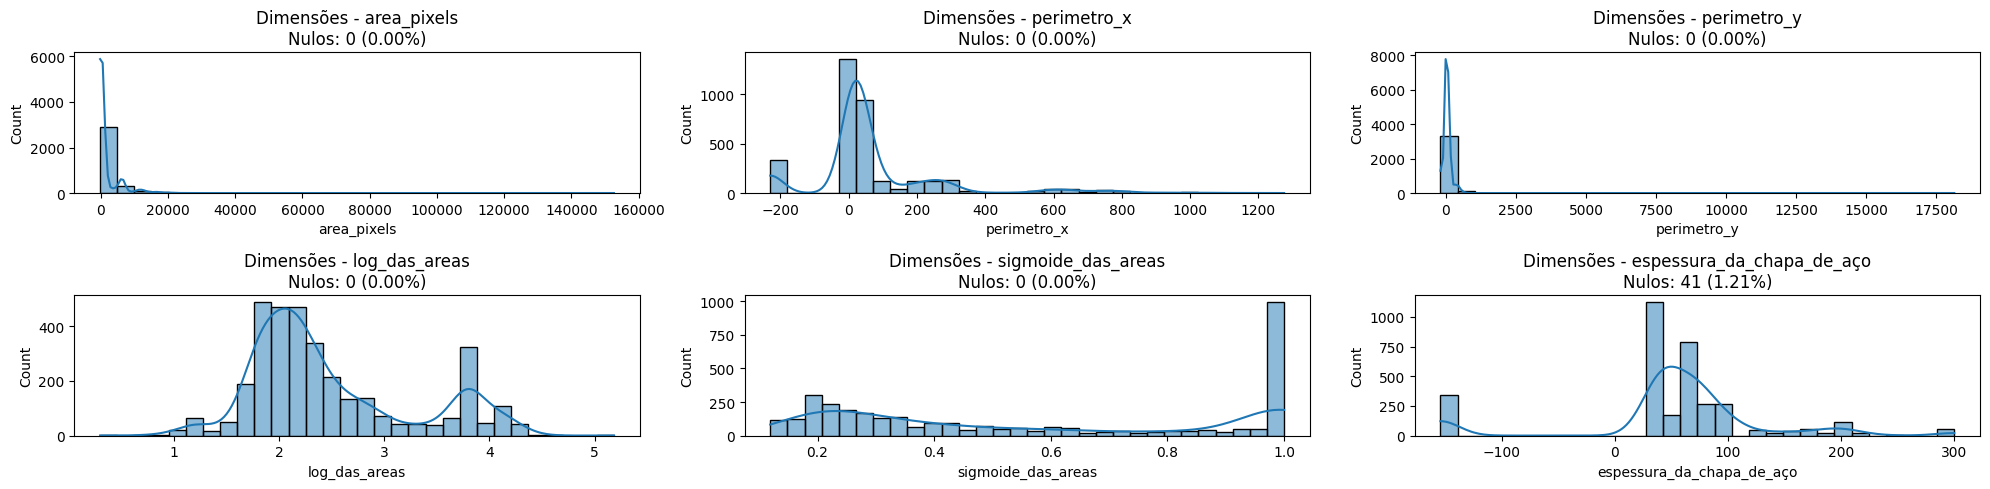

In [16]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['area_pixels', 'perimetro_x', 'perimetro_y', 'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(train[col], kde=True, bins=30)

    # Cálculo de nulos
    num_nulls = train[col].isnull().sum()
    percentage_nulls = (num_nulls / len(train)) * 100

    # Título com informações de nulos
    plt.title(
        f"Dimensões - {col}\nNulos: {num_nulls} ({percentage_nulls:.2f}%)"
    )
plt.tight_layout()
plt.show()


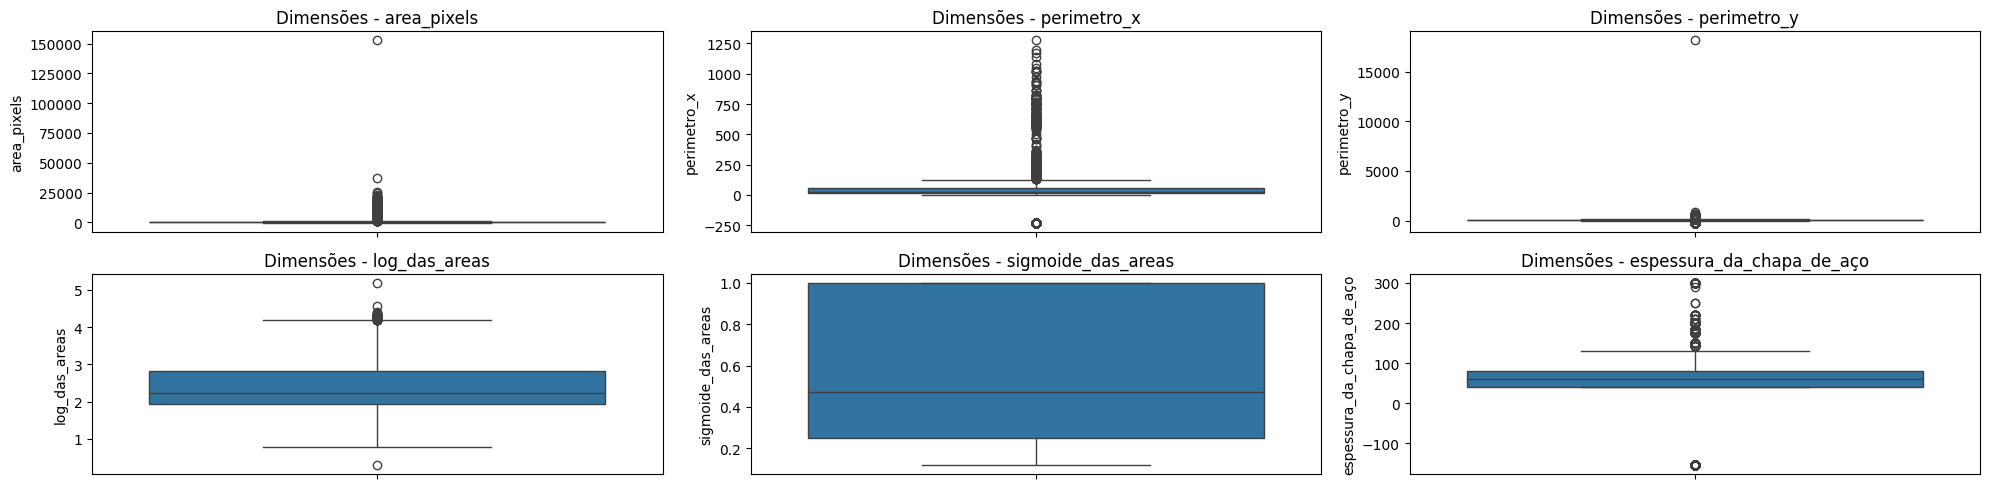

In [19]:
# prompt: gere os boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
for i, col in enumerate(['area_pixels', 'perimetro_x', 'perimetro_y', 'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train[col]) # Changed to boxplot
    plt.title(f"Dimensões - {col}")
plt.tight_layout()
plt.show()


In [20]:

# Medidas descritivas para as variáveis especificadas
print(train[['area_pixels', 'perimetro_x', 'perimetro_y', 'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço']].describe())

# Verificar por valores nulos
print("\nValores nulos:")
print(train[['area_pixels', 'perimetro_x', 'perimetro_y', 'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço']].isnull().sum())

# Verificar por duplicados
print("\nDuplicados:")
print(train.duplicated(subset=['area_pixels', 'perimetro_x', 'perimetro_y', 'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço']).sum())


         area_pixels  perimetro_x   perimetro_y  log_das_areas  \
count    3390.000000  3390.000000   3390.000000    3390.000000   
mean     1566.317699    66.733923     47.261062       2.476344   
std      4337.683975   195.092105    336.794632       0.772512   
min      -206.000000  -229.000000   -194.000000       0.301000   
25%        68.000000    12.000000     11.000000       1.929400   
50%       142.000000    22.000000     21.000000       2.225300   
75%       524.750000    58.000000     56.000000       2.829625   
max    152655.000000  1275.000000  18152.000000       5.183700   

       sigmoide_das_areas  espessura_da_chapa_de_aço  
count         3390.000000                3349.000000  
mean             0.570363                  53.130487  
std              0.335394                  85.295729  
min              0.119000                -154.000000  
25%              0.248200                  40.000000  
50%              0.472100                  60.000000  
75%              0.9

Comentários:

As variáveis de dimensão do defeito apresentam distribuições bastante assimétricas. A `area_pixels` (área em pixels do defeito) tem mediana **142** e média **~1.566**, indicando forte assimetria à direita (alguns defeitos muito maiores que a maioria).  

O valor mínimo registrado de área é **-206**, o que é fisicamente impossível (área negativa) – um claro erro nos dados. A área máxima atinge **152.655 pixels**, muito acima do percentil 75 (**~525**), evidenciando outliers extremos (defeitos excepcionalmente grandes).  

Os perímetros, separados em `perímetro_x` e `perímetro_y`, também mostram distribuição semelhante: medianas baixas (**22** e **21**, respectivamente) contra máximos muito altos (**1.275** e **18.152**). Notavelmente, há perímetros negativos (`perímetro_x` mínimo **-229**, `perímetro_y` mínimo **-194**) – outro indicativo de erro ou cálculo incorreto.  

Esses outliers negativos e positivos sugerem que alguns registros podem ter sido computados erroneamente (por exemplo, se `x_max < x_min`, o cálculo de comprimento poderia resultar negativo).  

Em resumo, a maioria dos defeitos tem áreas e perímetros pequenos, mas existem alguns casos atípicos de dimensões enormes e até valores inválidos que distorcem as estatísticas.



## 2.3 Luminosidade (Soma, Mínimo e Máximo de Intensidade)

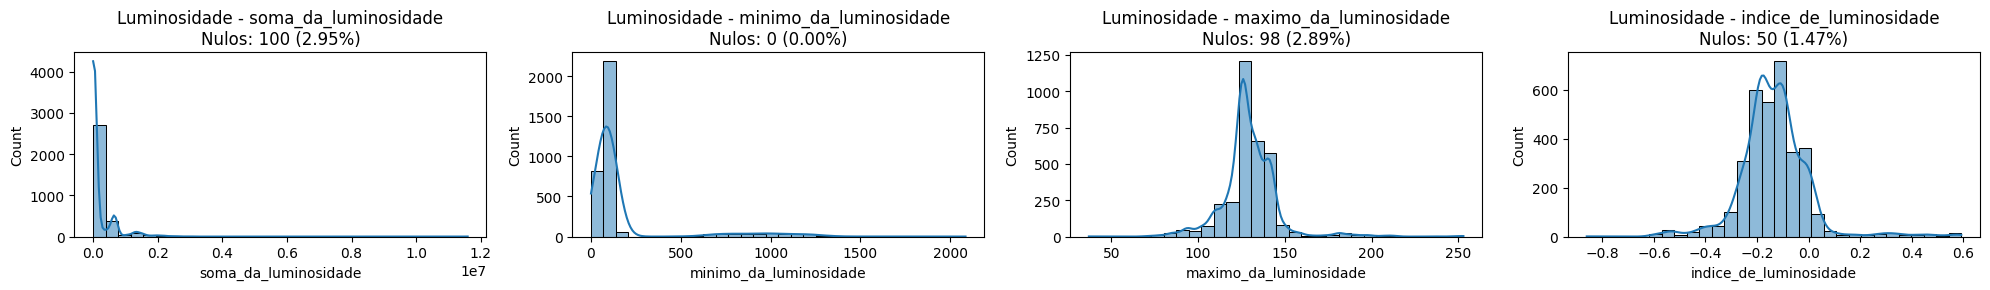

In [22]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['soma_da_luminosidade', 'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade'], 1):
    plt.subplot(2, 4, i)
    sns.histplot(train[col], kde=True, bins=30)

    # Cálculo de nulos
    num_nulls = train[col].isnull().sum()
    percentage_nulls = (num_nulls / len(train)) * 100

    # Título com informações de nulos
    plt.title(
        f"Luminosidade - {col}\nNulos: {num_nulls} ({percentage_nulls:.2f}%)"
    )
plt.tight_layout()
plt.show()


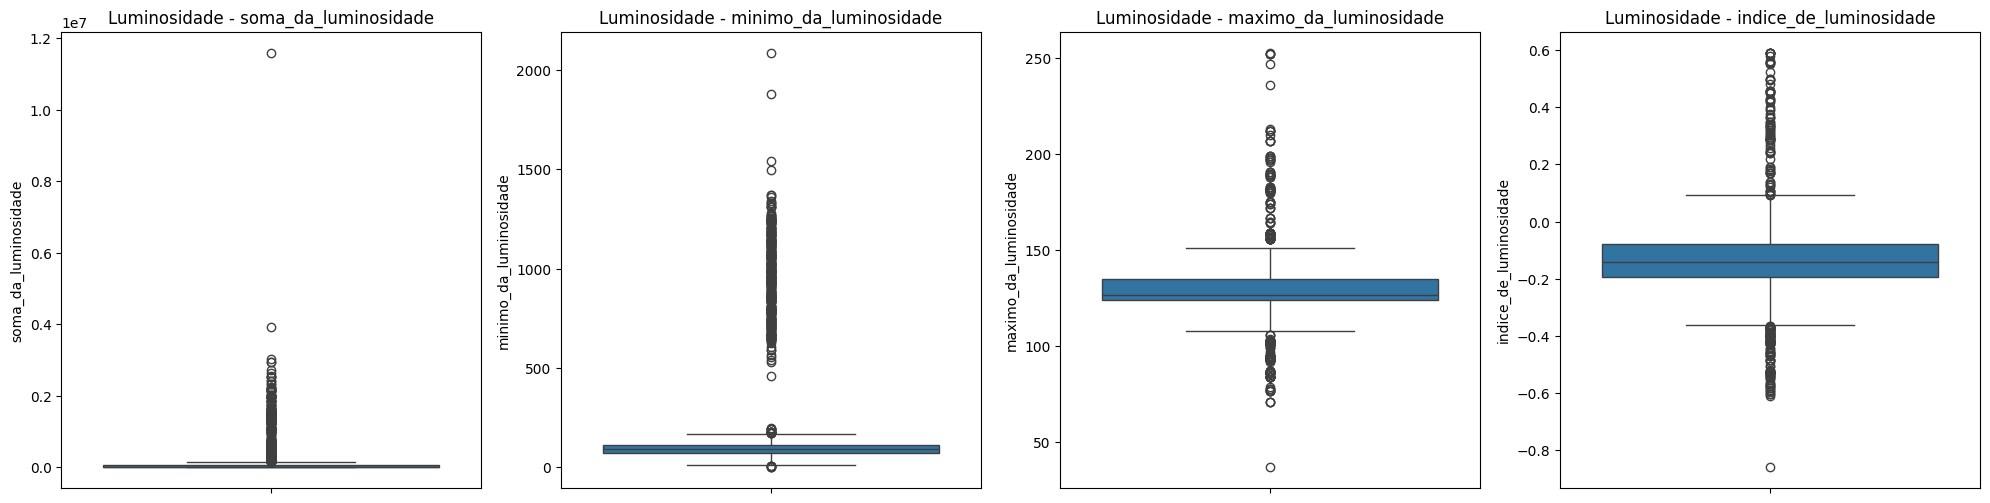

In [27]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(['soma_da_luminosidade', 'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade'], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=train[col]) # Changed to boxplot
    plt.title(f"Luminosidade - {col}")
plt.tight_layout()
plt.show()


In [28]:

# Medidas descritivas para as variáveis
print(train[['soma_da_luminosidade', 'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade']].describe())

# Verificar por valores nulos
print("\nValores nulos:")
print(train[['soma_da_luminosidade', 'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade']].isnull().sum())

# Verificar por duplicados
print("\nDuplicados:")
print(train.duplicated(subset=['soma_da_luminosidade', 'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade']).sum())


       soma_da_luminosidade  minimo_da_luminosidade  maximo_da_luminosidade  \
count          3.290000e+03             3390.000000             3292.000000   
mean           1.931079e+05              171.763422              129.187424   
std            4.549965e+05              272.952080               16.110521   
min            2.550000e+02                0.000000               37.000000   
25%            9.514500e+03               71.000000              124.000000   
50%            1.783600e+04               93.000000              127.000000   
75%            6.797800e+04              111.000000              135.000000   
max            1.159141e+07             2086.000000              253.000000   

       indice_de_luminosidade  
count             3340.000000  
mean                -0.134957  
std                  0.133175  
min                 -0.860300  
25%                 -0.193725  
50%                 -0.140800  
75%                 -0.079000  
max                  0.591700  


Comentários:

As variáveis relacionadas à luminosidade do defeito refletem características de brilho nos pixels. A `soma_da_luminosidade` possui mediana **~1,78×10^4** e média **~1,93×10^5**, com valores variando de **255** até **1,15×10^7**.  

Essa distribuição altamente assimétrica indica que defeitos maiores (ou mais brilhantes) elevam drasticamente a soma – novamente temos alguns outliers (valor máximo muito acima do terceiro quartil **~6,8×10^4**).  

O `máximo_da_luminosidade` (intensidade máxima de pixel no defeito) varia de **37** até **253**, com média **~129**. Esses valores estão dentro da faixa de **0–255** (escala usual de intensidade em imagens 8-bit), sugerindo que, em geral, os defeitos apresentam pixels não totalmente saturados.  

Já o `minimo_da_luminosidade` (intensidade mínima) varia de **0** até **2086**. Claramente, **2086** está muito acima do limite de **255** – um valor impossível para intensidade de pixel, indicando erro em pelo menos um registro. Fora esse ponto extremo, o segundo maior mínimo é **253**, e a média **~172** sugere que a maioria dos defeitos contém pixels relativamente escuros em seu interior.  

Em resumo, as medidas de luminosidade confirmam a presença de outliers: há um registro com mínimo de intensidade inválido e alguns defeitos excepcionalmente brilhantes ou extensos que elevam a soma de luminosidade.


## 2.4 Índices Estatísticos e Geométricos (Borda, Vazio, Forma, Variação, etc.)

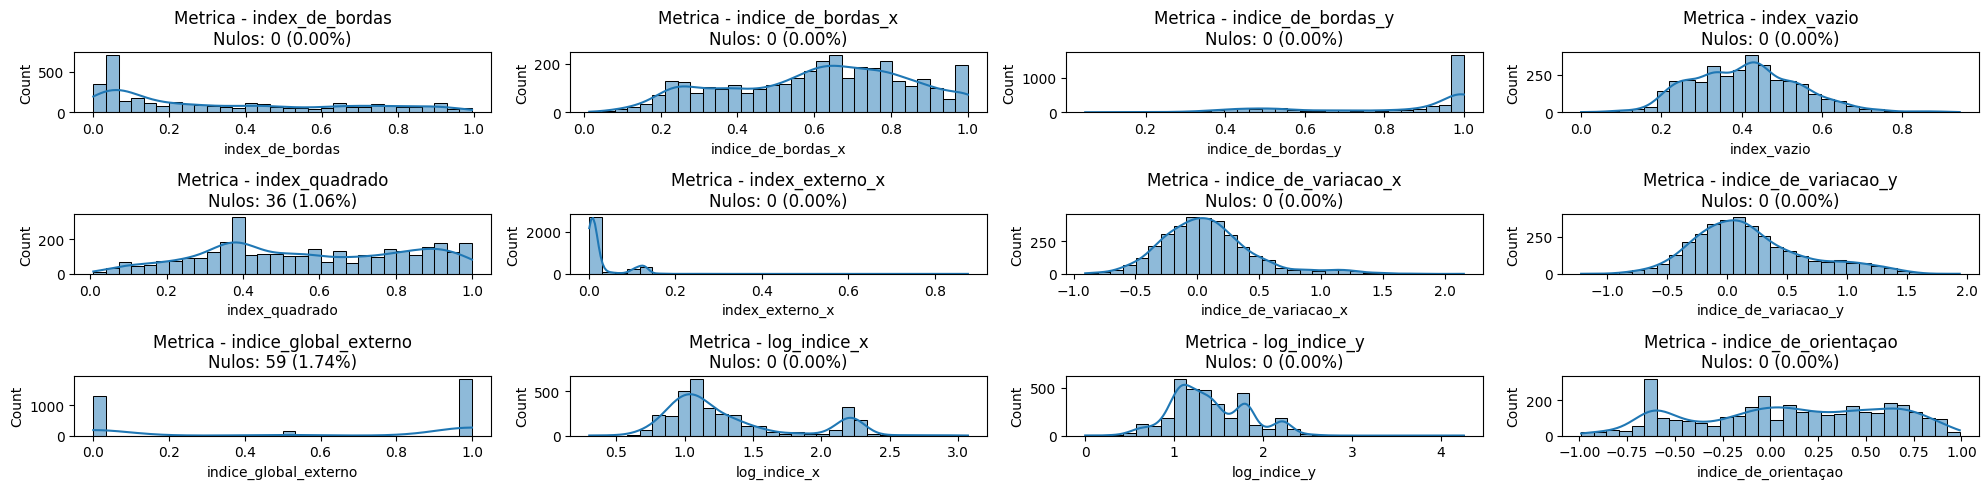

In [32]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['index_de_bordas', 'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio',
                         'index_quadrado', 'index_externo_x', 'indice_de_variacao_x', 'indice_de_variacao_y',
                         'indice_global_externo', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao'], 1):
    plt.subplot(3, 4, i)
    sns.histplot(train[col], kde=True, bins=30)

    # Cálculo de nulos
    num_nulls = train[col].isnull().sum()
    percentage_nulls = (num_nulls / len(train)) * 100

    # Título com informações de nulos
    plt.title(
        f"Metrica - {col}\nNulos: {num_nulls} ({percentage_nulls:.2f}%)"
    )
plt.tight_layout()
plt.show()


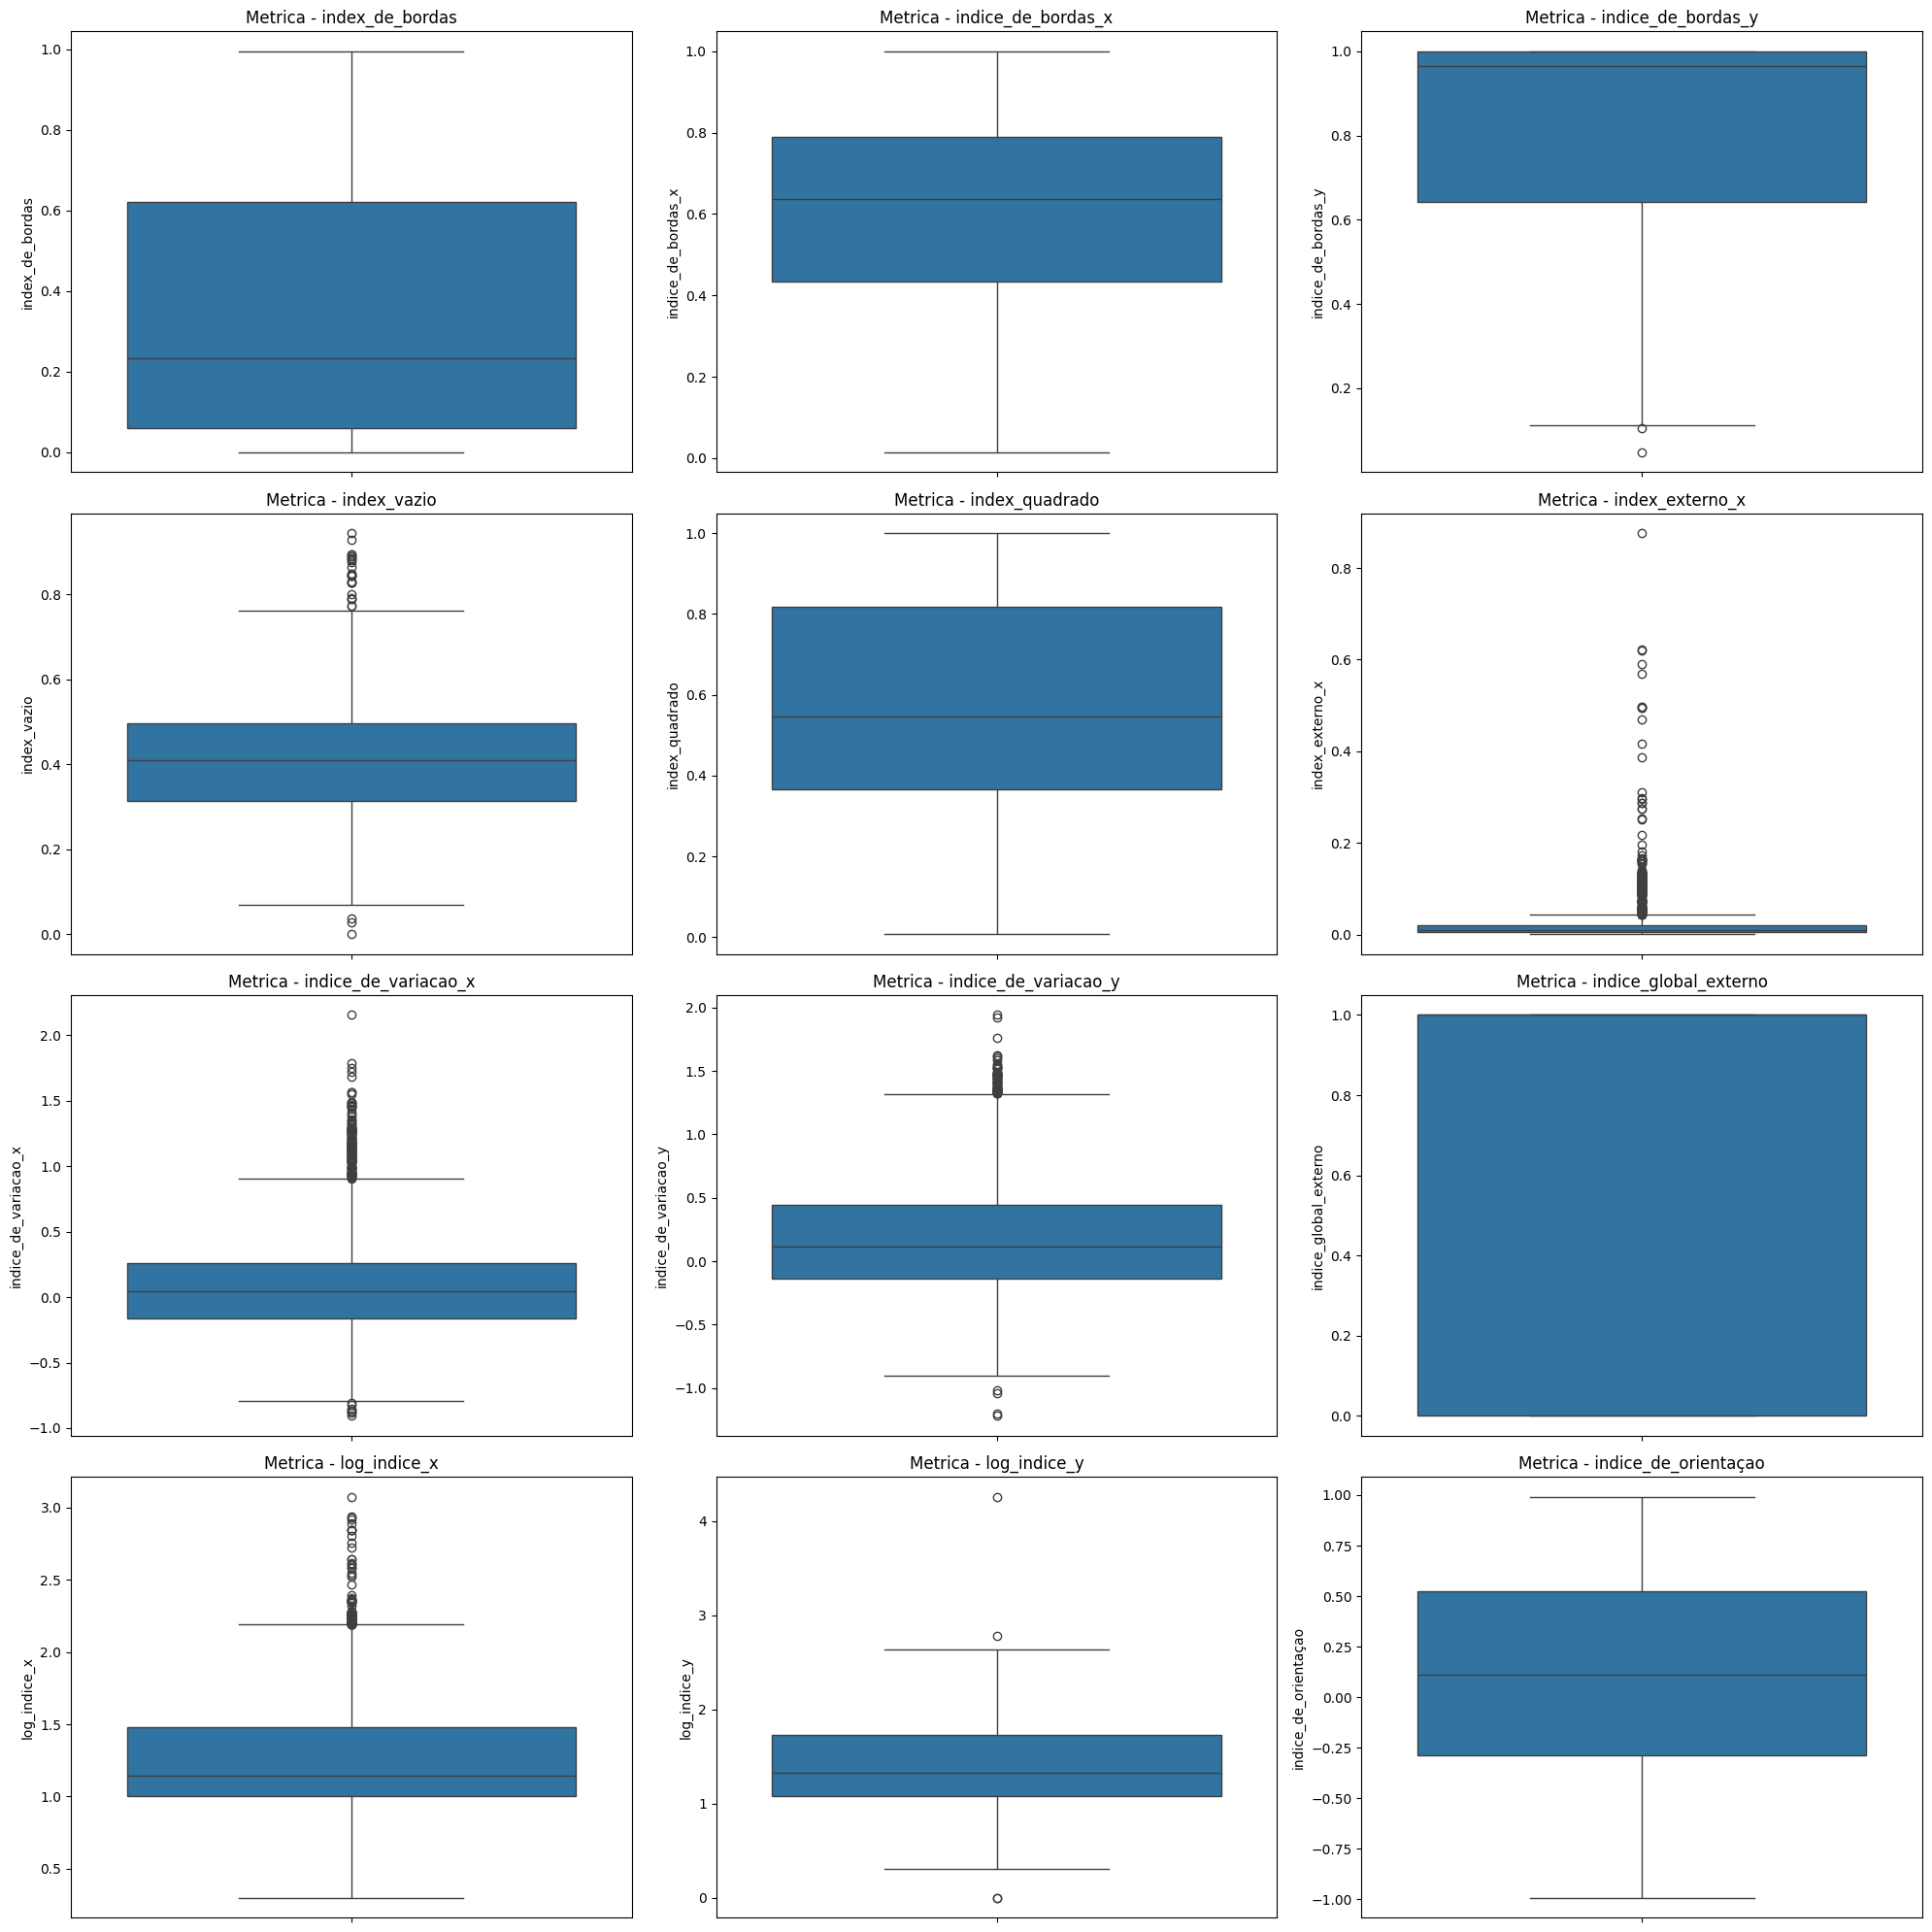

In [33]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(['index_de_bordas', 'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio',
                         'index_quadrado', 'index_externo_x', 'indice_de_variacao_x', 'indice_de_variacao_y',
                         'indice_global_externo', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao'], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=train[col]) # Changed to boxplot
    plt.title(f"Metrica - {col}")
plt.tight_layout()
plt.show()


In [35]:
print(train[['index_de_bordas', 'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio',
                         'index_quadrado', 'index_externo_x', 'indice_de_variacao_x', 'indice_de_variacao_y',
                         'indice_global_externo', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao']].describe())

# Verificar por valores nulos
print("\nValores nulos:")
print(train[['index_de_bordas', 'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio',
                         'index_quadrado', 'index_externo_x', 'indice_de_variacao_x', 'indice_de_variacao_y',
                         'indice_global_externo', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao']].isnull().sum())

# Verificar por duplicados
print("\nDuplicados:")
print(train.duplicated(subset=['index_de_bordas', 'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio',
                         'index_quadrado', 'index_externo_x', 'indice_de_variacao_x', 'indice_de_variacao_y',
                         'indice_global_externo', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao']).sum())




       index_de_bordas  indice_de_bordas_x  indice_de_bordas_y  index_vazio  \
count      3390.000000         3390.000000         3390.000000  3390.000000   
mean          0.340712            0.610754            0.828285     0.409954   
std           0.307037            0.230931            0.225691     0.133362   
min           0.000000            0.014400            0.048400     0.000000   
25%           0.060400            0.434975            0.642900     0.313350   
50%           0.232400            0.636400            0.964300     0.409750   
75%           0.621650            0.789500            1.000000     0.495975   
max           0.995200            1.000000            1.000000     0.943900   

       index_quadrado  index_externo_x  indice_de_variacao_x  \
count     3354.000000      3390.000000           3390.000000   
mean         0.572069         0.032006              0.083130   
std          0.263772         0.053980              0.381303   
min          0.008300         0.

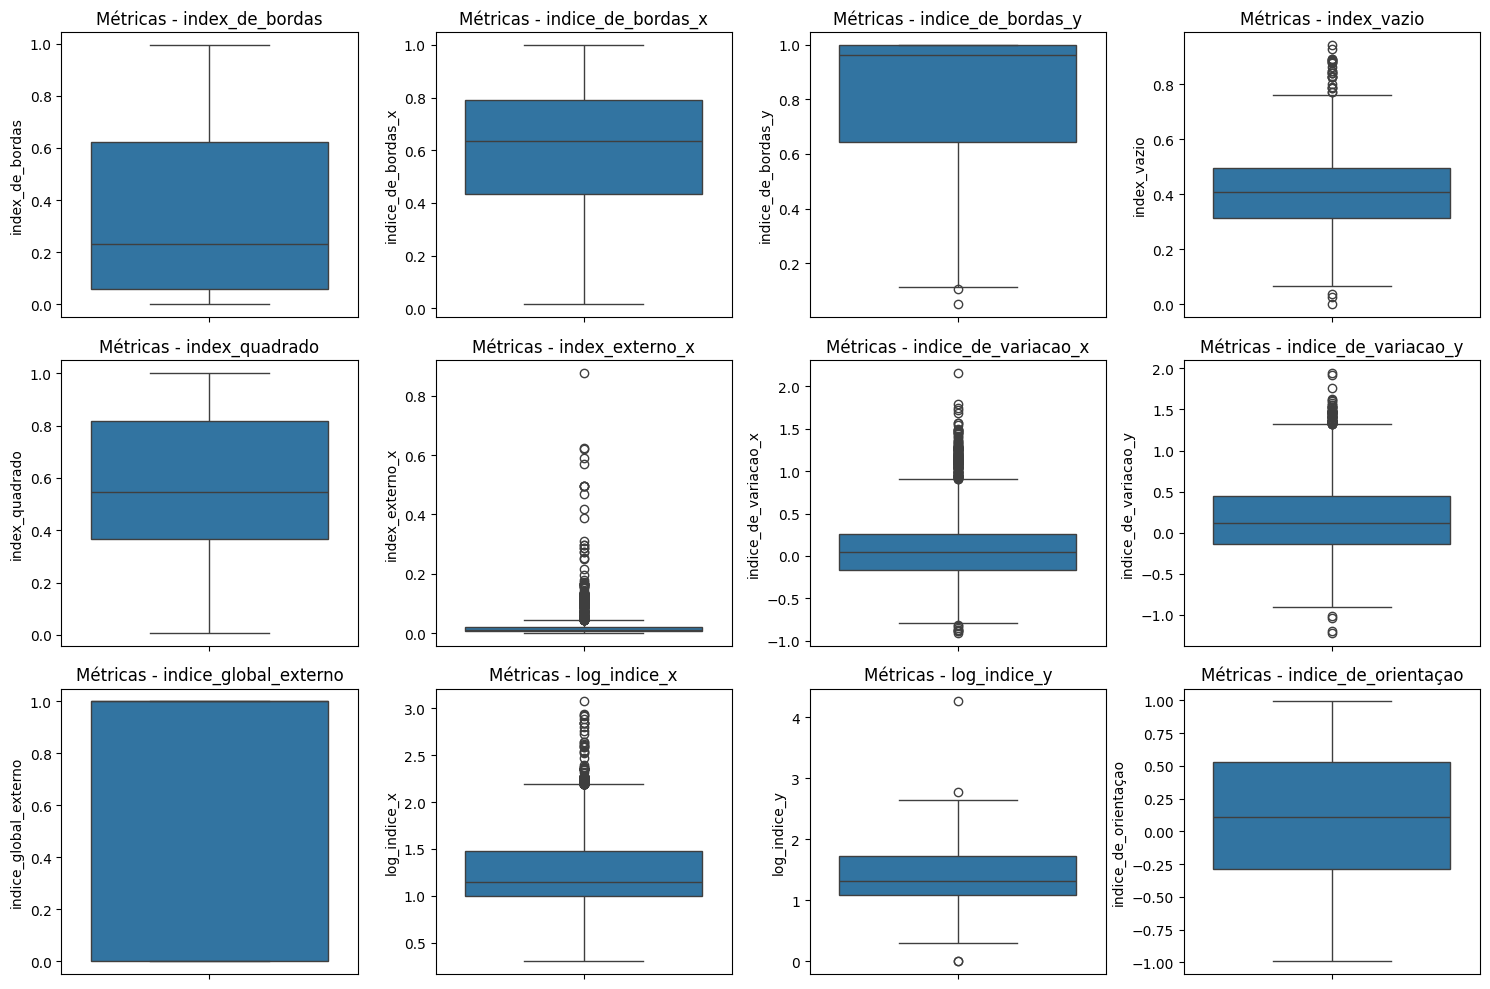

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['index_de_bordas', 'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio',
                         'index_quadrado', 'index_externo_x', 'indice_de_variacao_x', 'indice_de_variacao_y',
                         'indice_global_externo', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao'], 1):
    plt.subplot(3, 4, i)
    # Removed kde and bins arguments as they are not applicable to boxplot
    sns.boxplot(train[col])
    plt.title(f"Métricas - {col}")
plt.tight_layout()
plt.show()

Comentários:

 - index_de_bordas: Distribuição concentrada em valores baixos, indicando predominância de áreas com contornos regulares e pouco complexos.

 - indice_de_variacao_x e indice_de_variacao_y: Distribuição centrada em torno de 0, sugerindo pouca variação nas bordas horizontais e verticais das áreas detectadas.

 - indice_global_externo: Concentração em valores próximos a 1, indicando que a maioria das áreas apresenta contornos externos bem definidos e padronizados.

 - log_indice_x e log_indice_y: Padrões bimodais, sugerindo a presença de dois tipos distintos de áreas (pequenas e grandes) ou variações significativas nas formas detectadas.

## Processo / material

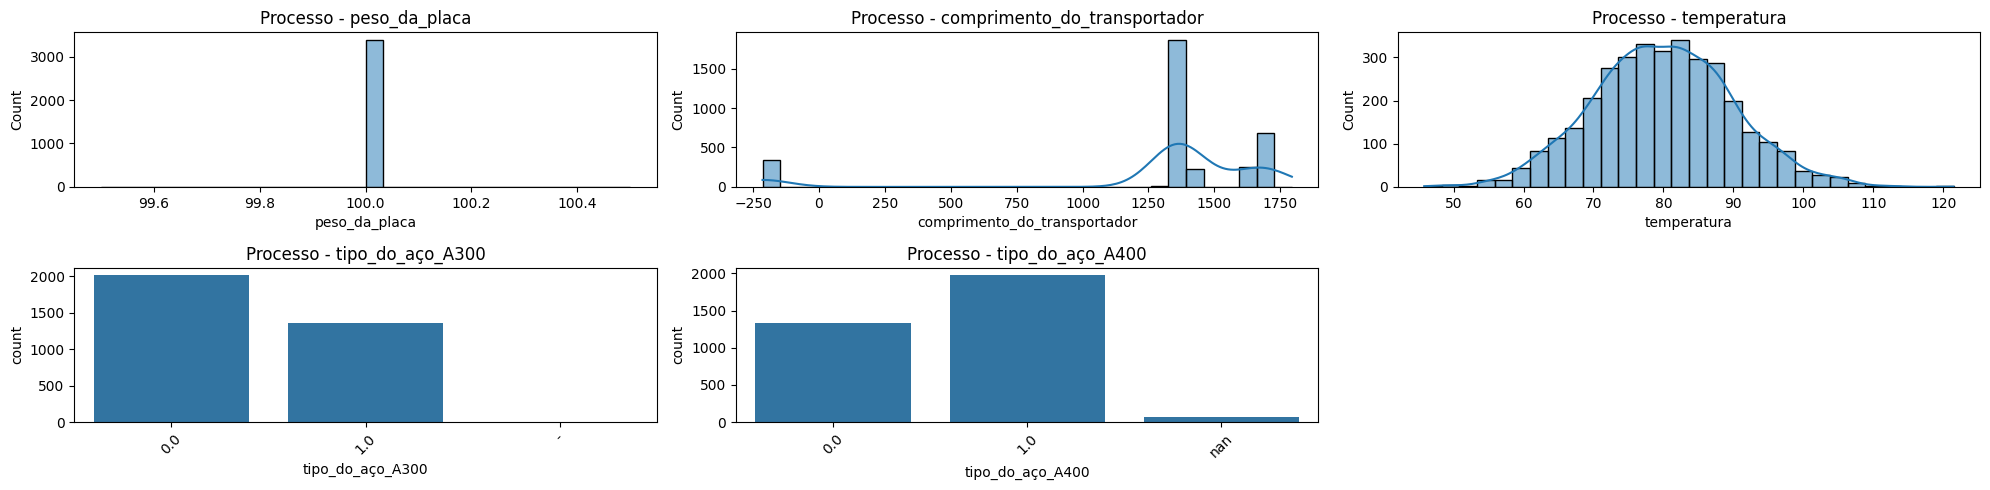

In [ ]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['peso_da_placa', 'comprimento_do_transportador',
                         'temperatura', 'tipo_do_aço_A300', 'tipo_do_aço_A400'], 1):
    plt.subplot(2, 3, i)

    if pd.api.types.is_numeric_dtype(train[col]):
        sns.histplot(train[col], kde=True, bins=30)
        plt.title(f"Processo - {col}")
    else:
        sns.countplot(x=train[col])
        plt.title(f"Processo - {col}")
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Medidas descritivas para as variáveis especificadas
print(train[['peso_da_placa', 'comprimento_do_transportador', 'temperatura', 'tipo_do_aço_A300', 'tipo_do_aço_A400']].describe())

# Verificar por valores nulos
print("\nValores nulos:")
print(train[['peso_da_placa', 'comprimento_do_transportador', 'temperatura', 'tipo_do_aço_A300', 'tipo_do_aço_A400']].isnull().sum())

# Verificar por duplicados
print("\nDuplicados:")
print(train.duplicated(subset=['peso_da_placa', 'comprimento_do_transportador', 'temperatura', 'tipo_do_aço_A300', 'tipo_do_aço_A400']).sum())


       peso_da_placa  comprimento_do_transportador  temperatura
count         3390.0                   3390.000000  3390.000000
mean           100.0                   1293.171681    79.924760
std              0.0                    521.109121    10.000343
min            100.0                   -214.000000    45.801848
25%            100.0                   1356.000000    73.137252
50%            100.0                   1362.000000    79.785356
75%            100.0                   1634.000000    86.593446
max            100.0                   1794.000000   121.478951

Valores nulos:
peso_da_placa                    0
comprimento_do_transportador     0
temperatura                      0
tipo_do_aço_A300                 0
tipo_do_aço_A400                76
dtype: int64

Duplicados:
0


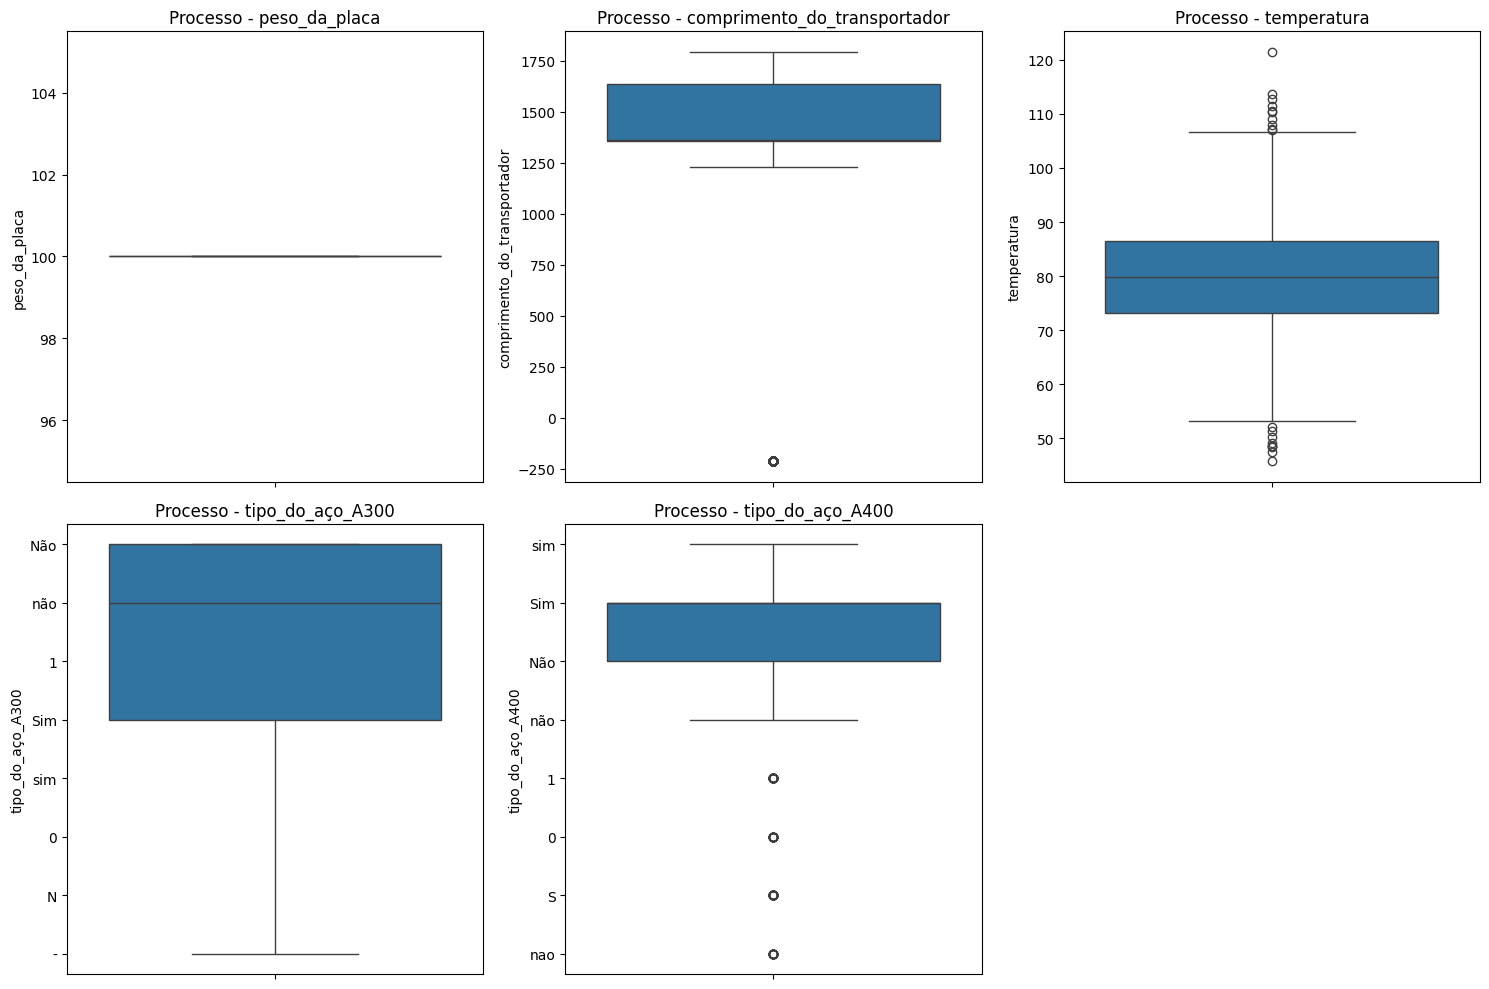

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
# Changed subplot grid to 2x3 to accommodate 5 plots + colorbar
for i, col in enumerate(['peso_da_placa', 'comprimento_do_transportador',
                         'temperatura', 'tipo_do_aço_A300', 'tipo_do_aço_A400'], 1):
    plt.subplot(2, 3, i)
    # Removed kde and bins arguments as they are not applicable to boxplot
    sns.boxplot(train[col])
    plt.title(f"Processo - {col}")
plt.tight_layout()
plt.show()

Comentários:

 - peso_da_placa: Valor extremamente concentrado em 100, sugerindo que quase todas as placas possuem o mesmo peso ou há um problema na coleta de dados.

 - comprimento_do_transportador: Distribuição multimodal, com picos em 1000 e 1500. Pode indicar a presença de processos distintos ou transportadores de tamanhos variados.

 - temperatura: Distribuição normal centrada em 80°C, sugerindo um controle rigoroso da temperatura do processo.

 - tipo_do_aco_A300 e tipo_do_aco_A400: A distribuição dos tipos de aço mostra uma predominância de amostras marcadas como 1.0 para o Aço A400, enquanto o Aço A300 apresenta maior quantidade de amostras 0.0. A presença de valores ausentes (NaN e ,) indica a necessidade de padronização e tratamento dos dados para evitar distorções nas análises. A proporção entre os tipos de aço pode ser relevante para identificar correlações com características de processo e falhas.

## Variáveis-alvo

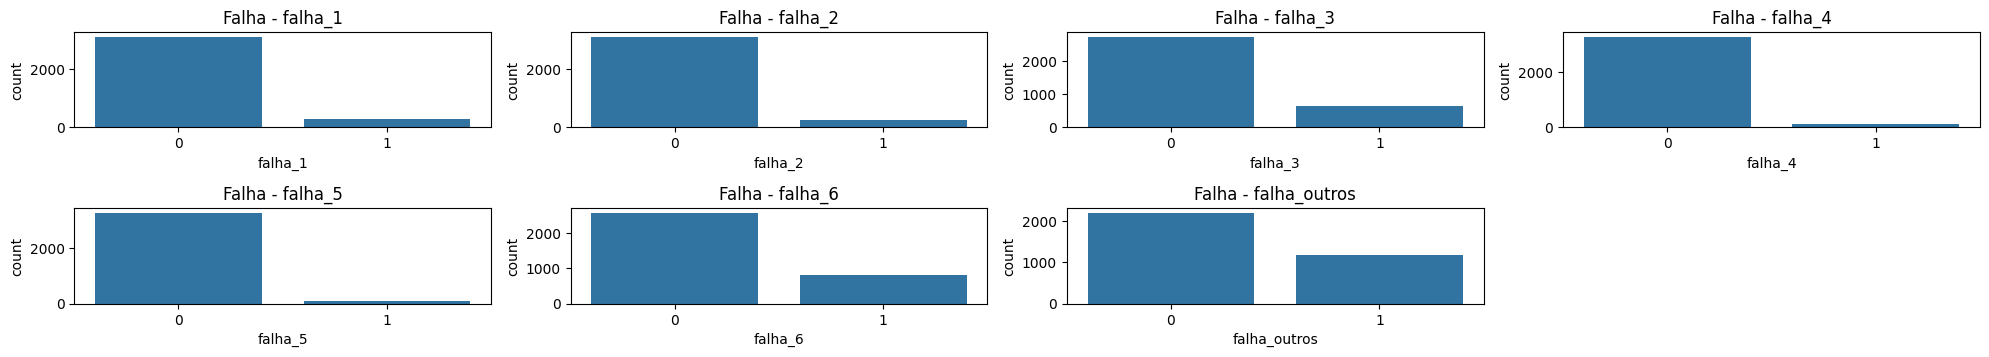

In [ ]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros'], 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=train[col])
    plt.title(f"Falha - {col}")
plt.tight_layout()
plt.show()

In [ ]:
# prompt: metricas descritivos das falhas

import pandas as pd

# Load the dataframe (assuming it's already loaded as 'train' from the previous code)
# If not, replace this with your dataframe loading code
# Example: train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp DS/Projeto Final/Cópia de bootcamp_train.csv')

# Function to calculate descriptive metrics for failure variables
def failure_metrics(df):
    failure_cols = [col for col in df.columns if 'falha_' in col]
    metrics = {}

    for col in failure_cols:
        metrics[col] = {
            'total': df[col].count(),  # Total number of observations
            'positive_cases': df[col].sum(),  # Number of positive cases (assuming 1 represents failure)
            'negative_cases': df[col].count() - df[col].sum(),  # Number of negative cases
            'failure_rate': df[col].mean()  # Percentage of failures
        }

    return metrics

# Calculate and print metrics
failure_data = failure_metrics(train)
for col, metrics in failure_data.items():
    print(f"Metrics for {col}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")
    print("-" * 20)

# Example access to a specific metric
# print(f"Failure rate for falha_1: {failure_data['falha_1']['failure_rate']}")


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('int64'), dtype('<U16277')) -> None

- A análise das variáveis de falha (falha_1 a falha_6 e falha_outros) revela uma predominância significativa de valores 0, indicando a ausência de falhas na maioria das amostras. No entanto, falha_6 e falha_outros apresentam uma proporção relativamente maior de ocorrências (1), sugerindo que esses tipos de falhas são mais frequentes ou mais susceptíveis a ocorrer. A uniformidade dos demais tipos de falhas (falha_1 a falha_5) indica um padrão consistente de baixa ocorrência. A análise cruzada com variáveis de processo e material pode identificar correlações relevantes.

In [ ]:
print("\n -  Tipos de dados")
print(train.dtypes.value_counts())

print("\n -  Informações dos dados")
print(train.info())


 -  Tipos de dados
float64     20
int64       10
category     7
category     1
category     1
Name: count, dtype: int64

 -  Informações dos dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            3390 non-null   int64   
 1   x_minimo                      3390 non-null   int64   
 2   x_maximo                      3334 non-null   float64 
 3   y_minimo                      3390 non-null   int64   
 4   y_maximo                      3390 non-null   int64   
 5   peso_da_placa                 3390 non-null   int64   
 6   area_pixels                   3390 non-null   int64   
 7   perimetro_x                   3390 non-null   int64   
 8   perimetro_y                   3390 non-null   int64   
 9   soma_da_luminosidade          3290 non-null   float64 
 10  maximo_da_luminosida

# **3. Valores Nulos**

In [ ]:
# Quantidade total de valores faltantes no dataframe
missing_total = train.isna().sum().sum()
print(f"Quantidade total de valores faltantes: {missing_total}\n")

Quantidade total de valores faltantes: 440



In [ ]:
# # prompt: Análise considerando a quantidade de valores faltantes por variável e avaliar o método de imputação mais adequado para cada uma delas com base nas suas características (numéricas, categóricas) e impacto potencial.

# import pandas as pd
# import matplotlib.pyplot as plt
# # Análise de valores faltantes e método de imputação

# missing_cols = train.isna().sum()
# missing_cols = missing_cols[missing_cols > 0].sort_values(ascending=False)

# for col in missing_cols.index:
#     print(f"\nVariável: {col}")
#     print(f"  Tipo de dado: {train[col].dtype}")
#     print(f"  Quantidade de valores faltantes: {missing_cols[col]}")
#     print(f"  Percentual de valores faltantes: {(missing_cols[col] / len(train) * 100).round(2)}%")

#     if pd.api.types.is_numeric_dtype(train[col]):
#       #  print("  Sugestão de Imputação: Média ou Mediana")
#         # Escolha entre média e mediana com base na distribuição (histograma)
#         plt.figure(figsize=(8, 4))
#         sns.histplot(train[col], kde=True, bins=30)
#         plt.title(f"Distribuição da variável {col}")
#         plt.show()
#         if train[col].skew() > 0.5 or train[col].skew() < -0.5 : # Verifica assimetria
#           print('   A distribuição da variável é assimétrica, logo a mediana é mais adequada')
#           #train[col].fillna(train[col].median(), inplace=True)

#         else:
#           print('   A distribuição da variável é simétrica, logo a média é mais adequada')
#           #train[col].fillna(train[col].mean(), inplace=True)

#     else:  # Variável categórica
#         print("  Sugestão de Imputação: Moda ou nova categoria 'Não informado'")
#         # Verifique a distribuição da variável categórica
#         plt.figure(figsize=(8, 4))
#         sns.countplot(x=train[col])
#         plt.title(f"Distribuição da variável {col}")
#         plt.show()
#         # Imputar pela moda ou criar nova categoria
#         #train[col].fillna(train[col].mode()[0], inplace=True)
#         # Ou: train[col].fillna('Não informado', inplace=True)




In [ ]:
# Quantidade e percentual de valores nulos por coluna
df_nulos = train.isna().sum()
df_nulos = df_nulos[df_nulos > 0].sort_values(ascending=False)
print("Valores nulos por coluna (quantidade):")
print(df_nulos)
print("\nValores nulos por coluna (percentual):")
print((df_nulos / len(train) * 100).round(2))

print("\n - Total nulos")
print(sum(df_nulos) )

print("\n - % nulos")
print(round((sum(df_nulos) / len(train)) * 100, 2))

Valores nulos por coluna (quantidade):
soma_da_luminosidade         100
maximo_da_luminosidade        98
indice_global_externo         59
x_maximo                      56
indice_de_luminosidade        50
espessura_da_chapa_de_aço     41
index_quadrado                36
dtype: int64

Valores nulos por coluna (percentual):
soma_da_luminosidade         2.95
maximo_da_luminosidade       2.89
indice_global_externo        1.74
x_maximo                     1.65
indice_de_luminosidade       1.47
espessura_da_chapa_de_aço    1.21
index_quadrado               1.06
dtype: float64

 - Total nulos
440

 - % nulos
12.98


✅ Resumo dos Valores nulos:

Esse percentual é considerável, o que pode impactar significativamente as análises e os modelos preditivos.



- Análise considerando a quantidade de valores faltantes por variável e avaliar o método de imputação mais adequado para cada uma delas com base nas suas características (numéricas, categóricas) e impacto potencial.

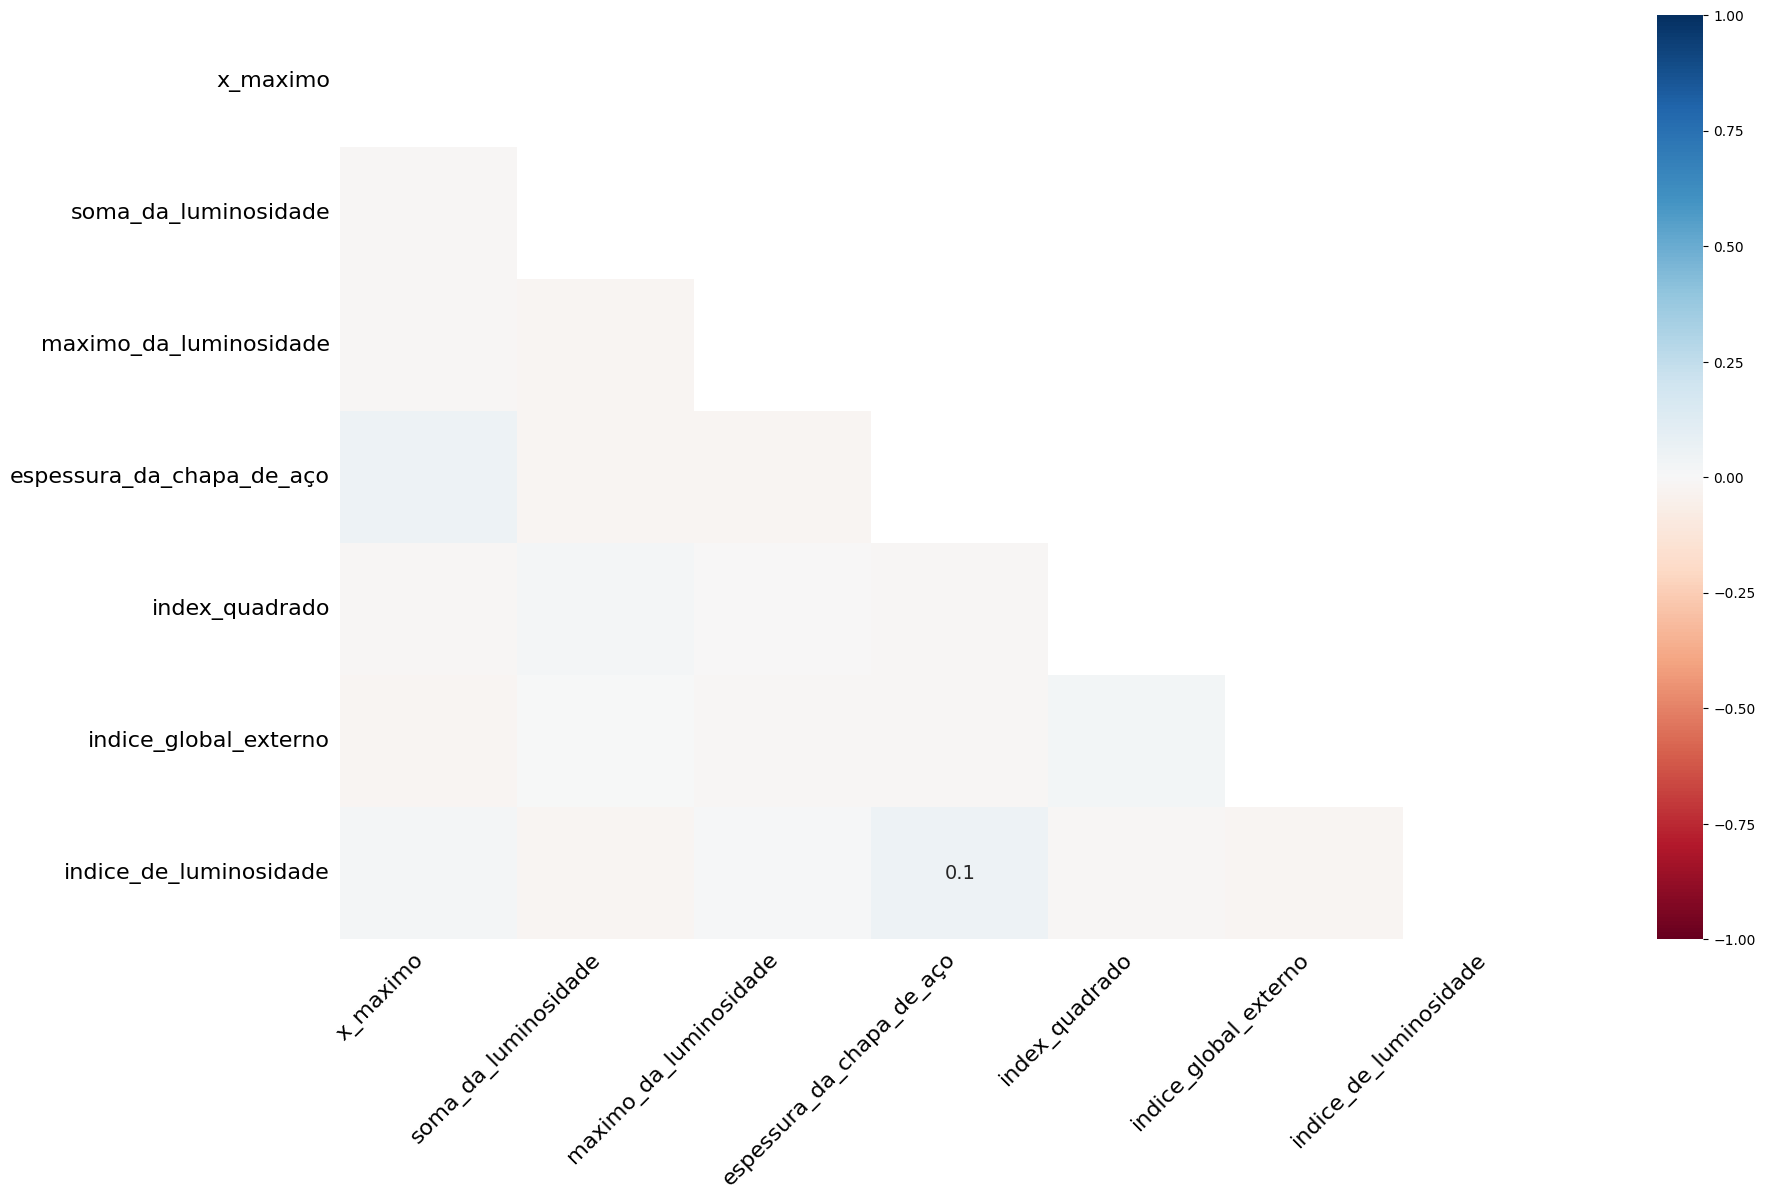

In [ ]:
#  Faça um heatmap de faltantes (seaborn) ou use missingno.matrix() para caçar padrões.

import matplotlib.pyplot as plt
import missingno as msno

# Heatmap de faltantes usando missingno
msno.heatmap(train)
plt.show()



* Pipeline de imputação guiado por diagnóstico Taxonomia de Rubin (MCAR / MAR / MNAR) fornece o diagnóstico.
  - A partir dele, o pipeline decide quando usar imputadores simples (média, mediana, moda), quando recorrer a métodos multivariados (K-NN, MICE) e quando criar flags de ausência.
  - Por fim, tudo fica encapsulado num Pipeline/ColumnTransformer para evitar data-leakage e garantir reprodutibilidade.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
nulos_df2 = train.columns[train.isnull().any()].tolist()

# Cria um dicionário para armazenar as estratégias de imputação para cada coluna
imputation_strategies = {}

# Itera sobre as colunas com valores ausentes, usando nomes exclusivos para cada transformador
for i, col in enumerate(nulos_df2):
    # Verifica o tipo de dado e a distribuição para determinar a estratégia de imputação
    if pd.api.types.is_numeric_dtype(train[col]):
        if train[col].skew() > 0.5 or train[col].skew() < -0.5:
            # Para distribuições assimétricas, usa a mediana
            imputation_strategies[col] = (f'median_{i}', SimpleImputer(strategy='median'))  # Nome exclusivo: median_i
        else:
            # Para distribuições aproximadamente simétricas, usa a média
            imputation_strategies[col] = (f'mean_{i}', SimpleImputer(strategy='mean'))  # Nome exclusivo: mean_i
    else:
        # Para variáveis categóricas, usa o valor mais frequente
        imputation_strategies[col] = (f'most_frequent_{i}', SimpleImputer(strategy='most_frequent'))  # Nome exclusivo: most_frequent_i

In [ ]:
# Cria um ColumnTransformer para aplicar diferentes estratégias de imputação a diferentes colunas
preprocessor = ColumnTransformer(
    transformers=[(name, transformer, [col]) for col, (name, transformer) in imputation_strategies.items()],
    remainder='passthrough'  # Mantém as demais colunas inalteradas
)

# Cria um pipeline com o pré-processador
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Ajusta e transforma os dados usando o pipeline
df_treino = pipeline.fit_transform(train)

# Converte o resultado de volta para um DataFrame
df_treino = pd.DataFrame(df_treino, columns=train.columns)

In [ ]:
train.describe()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,maximo_da_luminosidade,comprimento_do_transportador,espessura_da_chapa_de_aço,temperatura,index_de_bordas,index_vazio,index_quadrado,index_externo_x,indice_de_bordas_x,indice_de_bordas_y,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade
count,3390.000000,3390.000000,3334.00000,3.390000e+03,3.390000e+03,3390.0,3390.000000,3390.000000,3390.000000,3.290000e+03,3292.000000,3390.000000,3349.000000,3390.000000,3390.000000,3390.000000,3354.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3331.000000,3390.000000,3390.000000,3390.000000,3390.000000,3340.000000,3390.000000,3390.000000
mean,1694.500000,995.507375,605.90012,2.692640e+06,1.592301e+06,100.0,1566.317699,66.733923,47.261062,1.931079e+05,129.187424,1293.171681,53.130487,79.924760,0.340712,0.409954,0.572069,0.032006,0.610754,0.828285,0.083130,0.192553,0.589012,2.476344,1.317755,1.395298,0.099153,-0.134957,0.570363,171.763422
std,978.753033,1796.737709,548.07724,5.625693e+06,1.821345e+06,0.0,4337.683975,195.092105,336.794632,4.549965e+05,16.110521,521.109121,85.295729,10.000343,0.307037,0.133362,0.263772,0.053980,0.230931,0.225691,0.381303,0.473771,0.480665,0.772512,0.479221,0.429142,0.492312,0.133175,0.335394,272.952080
min,0.000000,-11.000000,-186.00000,-2.000000e+01,-1.660000e+02,100.0,-206.000000,-229.000000,-194.000000,2.550000e+02,37.000000,-214.000000,-154.000000,45.801848,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,-0.905854,-1.218085,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.860300,0.119000,0.000000
25%,847.250000,41.000000,179.00000,3.934352e+05,3.407380e+05,100.0,68.000000,12.000000,11.000000,9.514500e+03,124.000000,1356.000000,40.000000,73.137252,0.060400,0.313350,0.367200,0.006600,0.434975,0.642900,-0.165640,-0.136793,0.000000,1.929400,1.000000,1.079200,-0.285700,-0.193725,0.248200,71.000000
50%,1694.500000,614.000000,544.00000,1.265462e+06,1.128297e+06,100.0,142.000000,22.000000,21.000000,1.783600e+04,127.000000,1362.000000,60.000000,79.785356,0.232400,0.409750,0.545400,0.009500,0.636400,0.964300,0.047686,0.115746,1.000000,2.225300,1.146100,1.322200,0.111100,-0.140800,0.472100,93.000000
75%,2541.750000,1187.500000,1090.00000,2.555025e+06,2.184335e+06,100.0,524.750000,58.000000,56.000000,6.797800e+04,135.000000,1634.000000,80.000000,86.593446,0.621650,0.495975,0.818200,0.021275,0.789500,1.000000,0.263110,0.445916,1.000000,2.829625,1.477100,1.724300,0.526300,-0.079000,0.999300,111.000000
max,3389.000000,15266.000000,1713.00000,1.041366e+08,1.291709e+07,100.0,152655.000000,1275.000000,18152.000000,1.159141e+07,253.000000,1794.000000,300.000000,121.478951,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,2.155819,1.941325,1.000000,5.183700,3.074100,4.258700,0.991700,0.591700,1.000000,2086.000000


In [ ]:
df_treino.describe()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,maximo_da_luminosidade,comprimento_do_transportador,tipo_do_aço_A300,tipo_do_aço_A400,espessura_da_chapa_de_aço,temperatura,index_de_bordas,index_vazio,index_quadrado,index_externo_x,indice_de_bordas_x,indice_de_bordas_y,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
count,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0000,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390.0,3390.0,3390.000000,3390.0000,3390.0000,3390.0000,3390.0,3390.0,3390.000000,3390.000000,3390.0000,3390.0000,3390.0000,3390.0,3390.0,3390,3390,3390,3390,3390,3390,3390,3390
unique,946.0,1783.0,91.0,24.0,746.0,4.0,1476.0000,3390,1136,2017,1809,1,850,363,294,83,3.0,3.0,3390.000000,1347.0000,1286.0000,433.0000,778.0,618.0,3390.000000,3390.000000,862.0000,177.0000,215.0000,943.0,378.0,428,2,2,2,2,2,2,2
top,-186.0,17836.0,127.0,40.0,1.0,1.0,-0.1408,3389,-11,-20,-166,100,-206,-229,-194,1358,0.0,1.0,79.587061,0.0604,0.3333,0.0059,1.0,1.0,-0.255741,-0.298366,1.8261,0.9542,1.0792,0.0,1.0,84,0,0,0,0,0,0,0
freq,333.0,102.0,490.0,1129.0,147.0,1888.0,54.0000,1,339,339,339,3390,339,339,339,428,2018.0,1978.0,1.000000,104.0000,59.0000,160.0000,188.0,1528.0,1.000000,1.000000,39.0000,299.0000,170.0000,152.0,746.0,85,3115,3126,2741,3274,3294,2584,2206


In [ ]:
print("\n -  Tipos de dados")
print(df_treino.dtypes.value_counts())

print("\n -  Informações dos dados")
print(df_treino.info())


 -  Tipos de dados
object    39
Name: count, dtype: int64

 -  Informações dos dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            3390 non-null   object
 1   x_minimo                      3390 non-null   object
 2   x_maximo                      3390 non-null   object
 3   y_minimo                      3390 non-null   object
 4   y_maximo                      3390 non-null   object
 5   peso_da_placa                 3390 non-null   object
 6   area_pixels                   3390 non-null   object
 7   perimetro_x                   3390 non-null   object
 8   perimetro_y                   3390 non-null   object
 9   soma_da_luminosidade          3390 non-null   object
 10  maximo_da_luminosidade        3390 non-null   object
 11  comprimento_do_transportador  3390 non-null   ob

# **4. Valores Duplicados**

In [ ]:
# Nesta etapa, vamos identificar e tratar possíveis duplicatas no conjunto de dados.
# Linhas repetidas podem enviesar as estatísticas e levar a interpretações incorretas.

# 1️⃣ Verificar se existem linhas duplicadas
duplicatas = df_treino[df_treino.duplicated(keep=False)]
print(f"Número de linhas duplicadas: {len(duplicatas)}")


Número de linhas duplicadas: 0


#  **5. Análise Univariada**

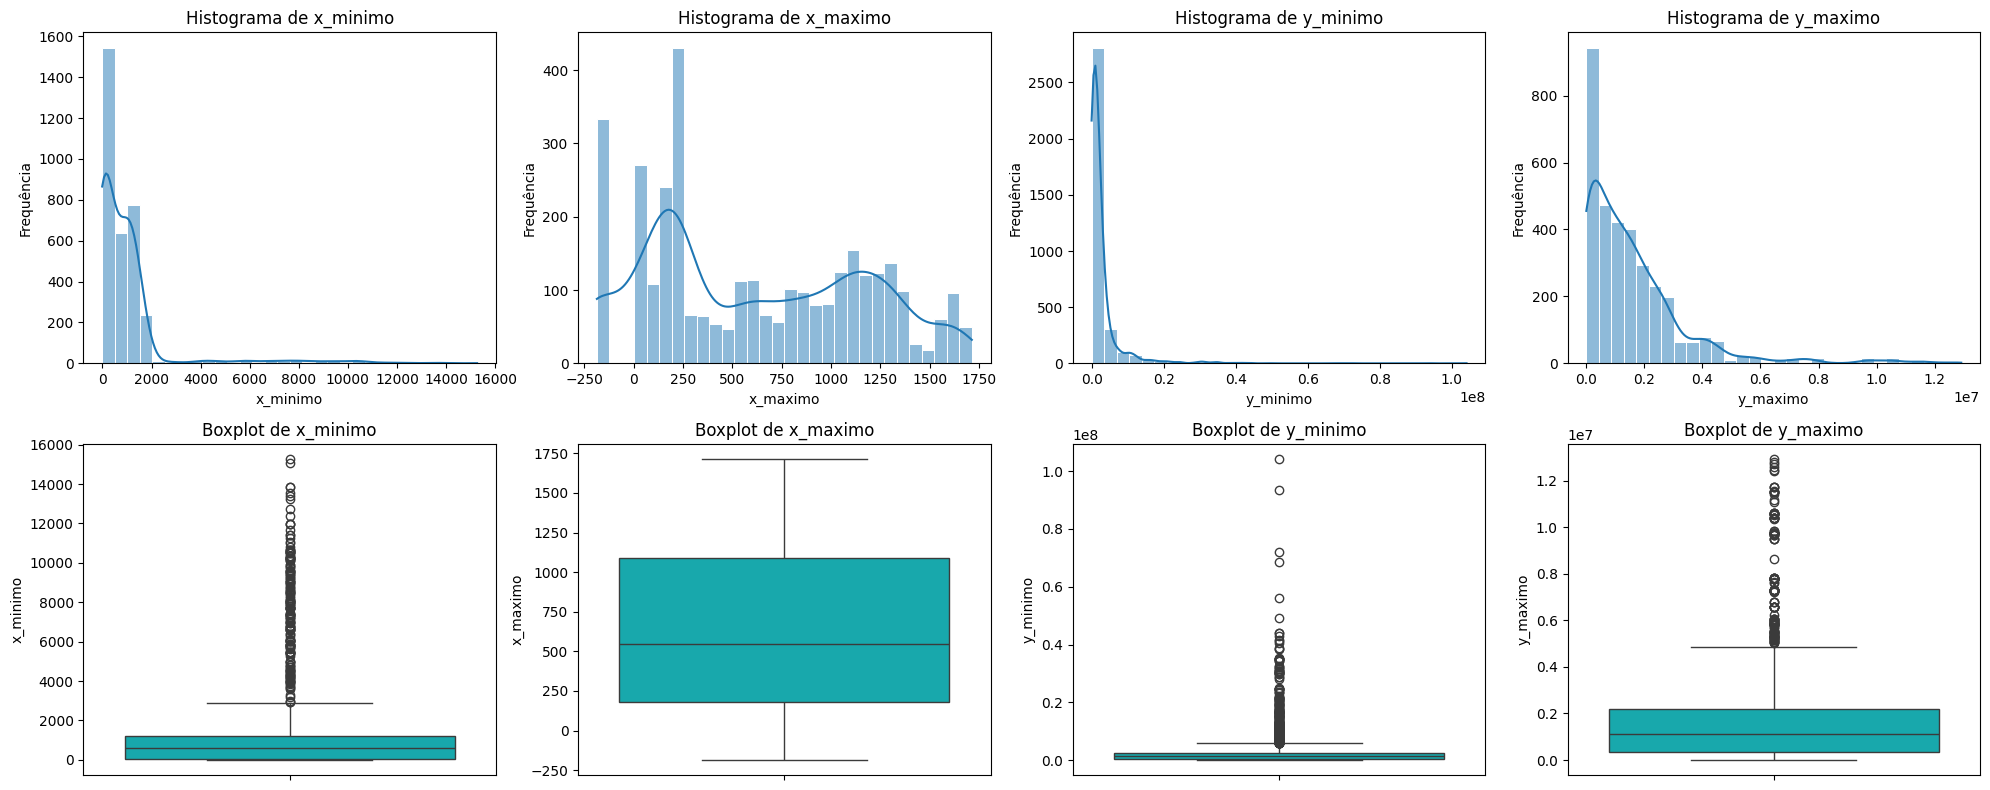

In [ ]:
vars_coord = ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo']

fig, axes = plt.subplots(
    nrows=2,
    ncols=len(vars_coord),
    figsize=(20, 8),          # altura maior para acomodar duas linhas
    sharex=False              # cada coluna trata seu próprio eixo
)

for i, col in enumerate(vars_coord):
    # ---- Histograma (linha 0) ----
    sns.histplot(
        data=train,
        x=col,
        kde=True,
        bins=30,
        ax=axes[0, i],
        color='#1f77b4',
        edgecolor='white'
    )
    axes[0, i].set_title(f'Histograma de {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequência')

    # ---- Boxplot (linha 1) ----
    sns.boxplot(
        y=train[col],
        ax=axes[1, i],
        color='#00bfc4'
    )
    axes[1, i].set_title(f'Boxplot de {col}')
    axes[1, i].set_xlabel('')   # mantém limpo
    axes[1, i].set_ylabel(col)

plt.tight_layout()
plt.show()


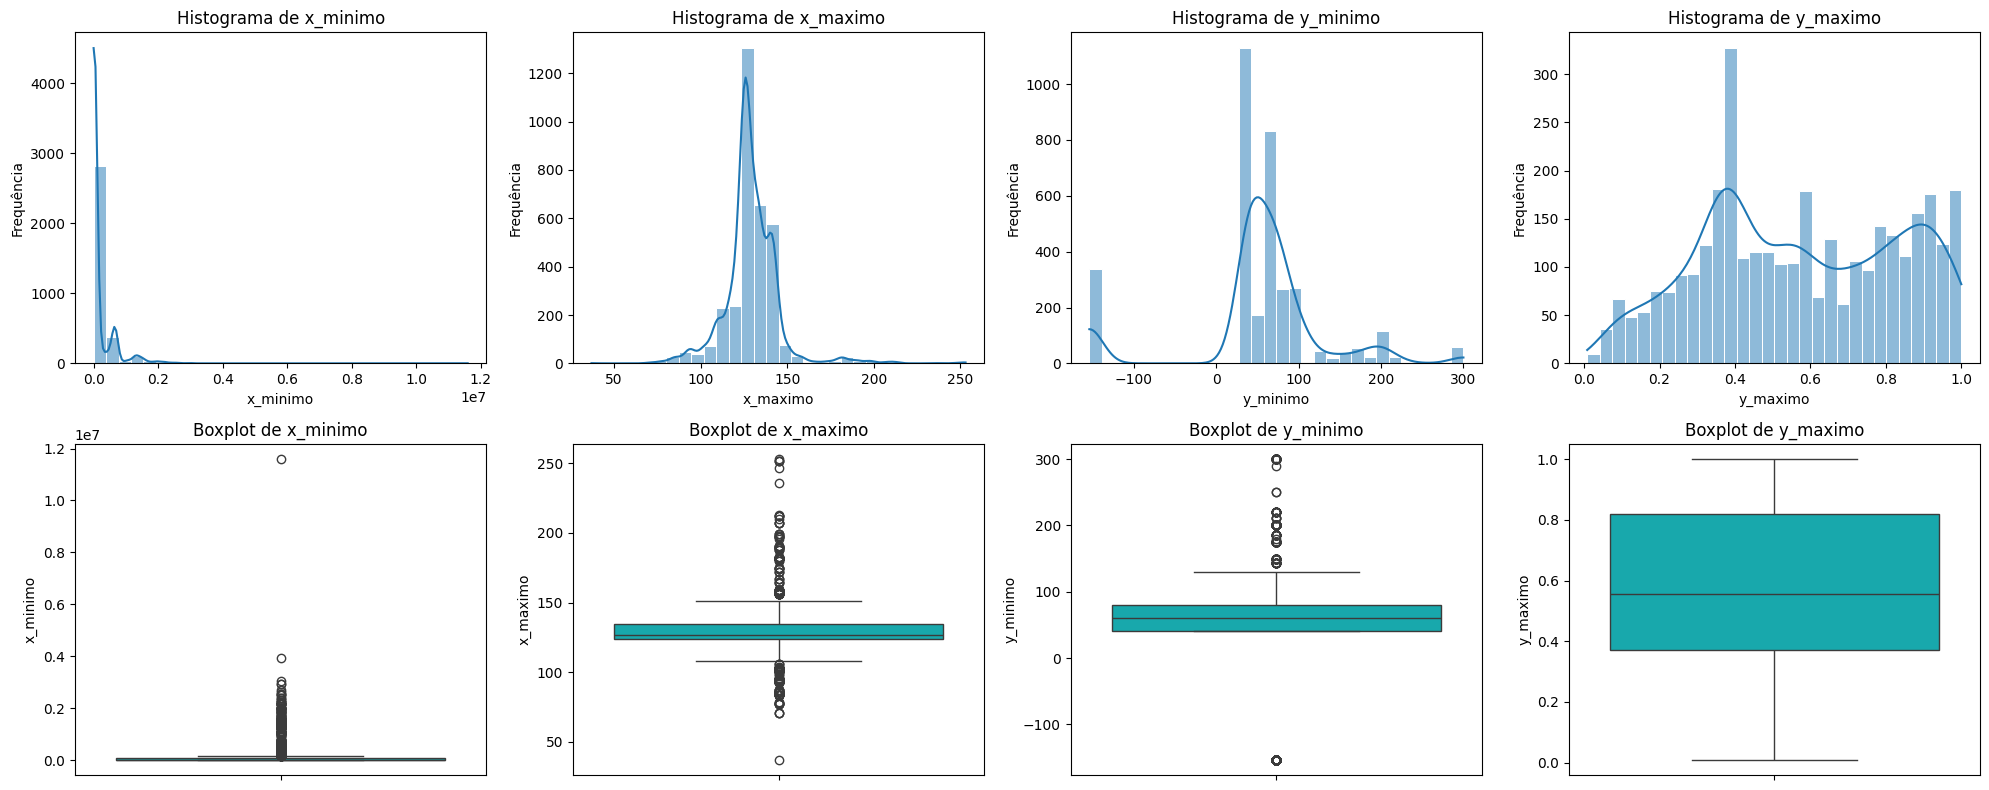

In [ ]:
vars_coord = ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo']

fig, axes = plt.subplots(
    nrows=2,
    ncols=len(vars_coord),
    figsize=(20, 8),          # altura maior para acomodar duas linhas
    sharex=False              # cada coluna trata seu próprio eixo
)

for i, col in enumerate(vars_coord):
    # ---- Histograma (linha 0) ----
    sns.histplot(
        data=df_treino,
        x=col,
        kde=True,
        bins=30,
        ax=axes[0, i],
        color='#1f77b4',
        edgecolor='white'
    )
    axes[0, i].set_title(f'Histograma de {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequência')

    # ---- Boxplot (linha 1) ----
    sns.boxplot(
        y=df_treino[col],
        ax=axes[1, i],
        color='#00bfc4'
    )
    axes[1, i].set_title(f'Boxplot de {col}')
    axes[1, i].set_xlabel('')   # mantém limpo
    axes[1, i].set_ylabel(col)

plt.tight_layout()
plt.show()


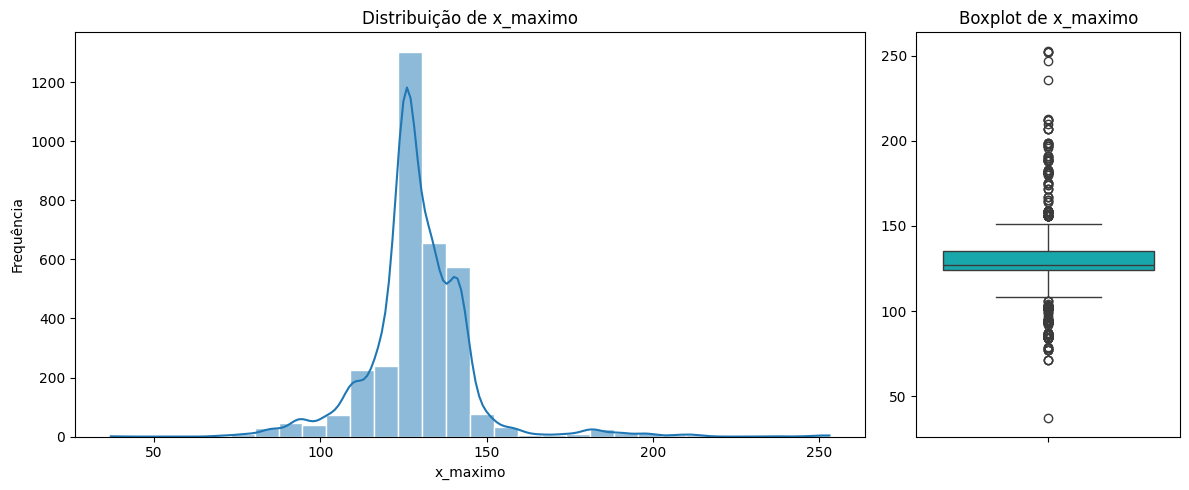

In [ ]:
# Ajuste o nome do DataFrame/coluna se estiver diferente
col = 'x_maximo'          # ou 'X_maximo', conforme o caso

fig, (ax_hist, ax_box) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(12, 5),
    gridspec_kw={'width_ratios': [3, 1]}  # 3 partes para o histo, 1 para o box
)

# Histograma + KDE
sns.histplot(df_treino[col], kde=True, bins=30, ax=ax_hist, color='#1f77b4', edgecolor='white')
ax_hist.set_title(f'Distribuição de {col}')
ax_hist.set_xlabel(col)
ax_hist.set_ylabel('Frequência')

# Boxplot
sns.boxplot(y=df_treino[col], ax=ax_box, color='#00bfc4')
ax_box.set_title(f'Boxplot de {col}')
ax_box.set_ylabel('')          # já está no histo

plt.tight_layout()
plt.show()
